In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

# Grocery Sales Dataset

In [2]:
sales_df = pd.read_csv('./grocery_sales.csv')
print(sales_df.shape)
sales_df.head()

(78, 4)


,storeID,product,quantity,revenue
0,A,Apples,1811,9300.6
1,A,Bananas,1003,3375.2
2,A,Oranges,1604,8528.5
3,B,Apples,1785,9181.0
4,B,Bananas,944,3680.2


## Manual Feature Extraction I

In [3]:
# calculate price from quantity sold and total revenue
sales_df['price'] = sales_df['revenue'] / sales_df['quantity']

# drop the quantity and revenue features
reduced_df = sales_df.drop(['quantity', 'revenue'], axis=1)
reduced_df.head()

,storeID,product,price
0,A,Apples,5.135616
1,A,Bananas,3.365105
2,A,Oranges,5.317020
3,B,Apples,5.143417
4,B,Bananas,3.898517


# ANSUR Variant I

In [4]:
height_df = pd.read_csv('./height_df.csv')
print(height_df.shape)
height_df.head()

(100, 4)


,weight_kg,height_1,height_2,height_3
0,81.5,1.78,1.80,1.80
1,72.6,1.70,1.70,1.69
2,92.9,1.74,1.75,1.73
3,79.4,1.66,1.68,1.67
4,94.6,1.91,1.93,1.90


## Manual Feature Extraction II

In [6]:
# calculate the mean height
height_df['height'] = height_df.iloc[:, 1:].mean(axis=1)

# drop the 3 height measurements
reduced_df = height_df.drop(['height_1', 'height_2', 'height_3'], axis=1)
reduced_df.head()

,weight_kg,height
0,81.5,1.793333
1,72.6,1.696667
2,92.9,1.740000
3,79.4,1.670000
4,94.6,1.913333


# ANSUR Variant II

In [7]:
ansur_df = pd.read_csv('./ansur_sample.csv')
print(ansur_df.shape)
ansur_df.head()

(250, 4)


,Height m,Buttock Height,Waist Circumference,Shoulder Circumference
0,1.776,882,933,1151
1,1.702,870,870,1119
2,1.735,901,964,1276
3,1.655,821,857,1155
4,1.914,1080,868,1231


## Calculating Principal Components

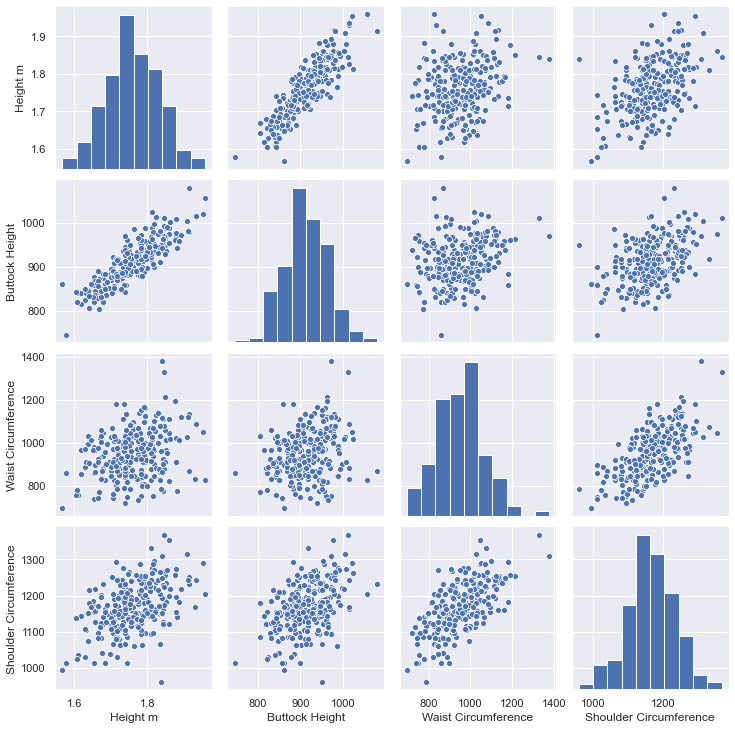

In [8]:
# inspect pairwise correlations before PCA
sns.pairplot(ansur_df)
plt.show()

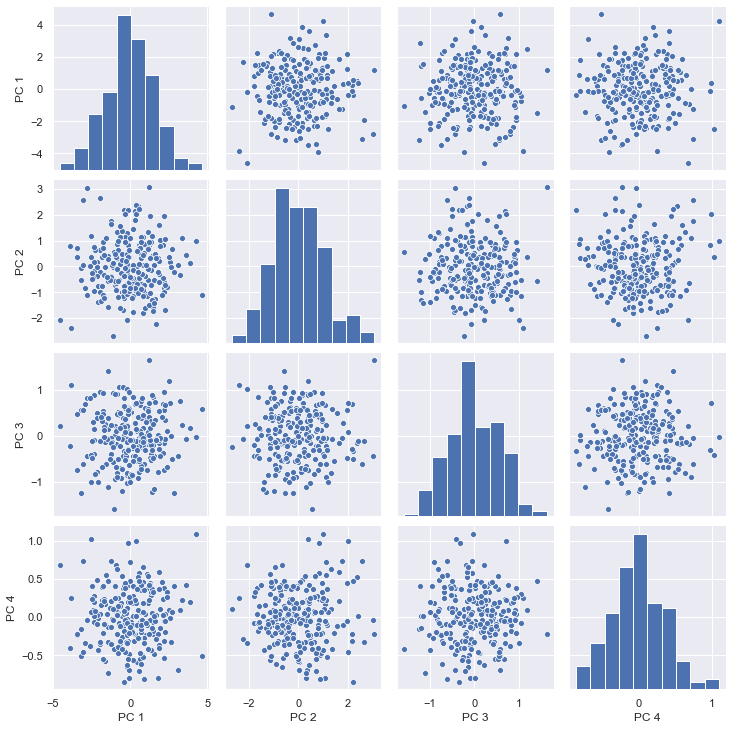

In [14]:
# initialize a scaler and standardize data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df)

# create PCA instance and fit_transform std data with it
pca = PCA()
pc = pca.fit_transform(ansur_std)

pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4'])

# now, inspect the pairwise correlations
sns.pairplot(pc_df)
plt.show()

In contrast to before applying PCA, there are no more strong correlations in the plot above.

# ANSUR Variant III

In [16]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [18]:
ansur_m = pd.read_csv('./ANSUR_II_MALE.csv')
print(ansur_m.shape)
ansur_m.head(3)

(4082, 99)


,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,Combat Arms,Regular Army,Male,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,175,853,81.5,1.776,25.838761,Overweight,Tall
1,Combat Support,Regular Army,Male,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,167,815,72.6,1.702,25.062103,Overweight,Normal
2,Combat Support,Regular Army,Male,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,180,831,92.9,1.735,30.861480,Overweight,Normal


In [21]:
ansur_df = ansur_m[['stature_m', 'buttockheight', 'waistdepth', 'span', 'waistcircumference', 'shouldercircumference',
                    'footlength', 'handlength', 'functionalleglength', 'chestheight', 'chestcircumference', 'cervicaleheight', 'sittingheight']]
print(ansur_df.shape)
ansur_df.head(3)

(4082, 13)


,stature_m,buttockheight,waistdepth,span,waistcircumference,shouldercircumference,footlength,handlength,functionalleglength,chestheight,chestcircumference,cervicaleheight,sittingheight
0,1.776,882,240,1782,933,1151,273,193,1136,1292,1074,1535,928
1,1.702,870,225,1745,870,1119,263,195,1096,1244,1021,1471,884
2,1.735,901,255,1867,964,1276,270,203,1115,1288,1120,1501,917


## PCA on a Larger Dataset

In [22]:
# scale the data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df)

# apply PCA
pca = PCA()
pca.fit(ansur_std)

PCA()

## PCA Explained Variance

In [23]:
# explained variance ratio of the components
print(pca.explained_variance_ratio_)

[0.57832831 0.2230137  0.06404218 0.04252456 0.0278581  0.01761021
 0.01681037 0.01014147 0.00706488 0.00607973 0.00344643 0.00228095
 0.00079911]


In [24]:
# cumulative sum of the explained variance ratio
print(pca.explained_variance_ratio_.cumsum())

[0.57832831 0.801342   0.86538419 0.90790875 0.93576684 0.95337706
 0.97018743 0.9803289  0.98739378 0.99347351 0.99691994 0.99920089
 1.        ]


Here, we can see that with using 4 principal components, we'd be able to explain 90\% of the variance in the 13 feature dataset.

# Pokemon Dataset

In [33]:
poke_df = pd.read_csv('./pokemon.csv')
print(poke_df.shape)
poke_df.head(3)

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


In [35]:
poke_df_ = poke_df.loc[:, 'HP':'Speed'] #numerical features
poke_cat_df = poke_df[['Type 1', 'Legendary']]

## Understanding the Components

In [30]:
# build a pipeline for scaling and applying PCA
steps = [('scaler', StandardScaler()),
         ('reducer', PCA(n_components=2))]
pipe = Pipeline(steps)

# fit to dataset and extract the component vectors
pipe.fit(poke_df_)
vectors = pipe.steps[1][1].components_.round(2)

# print feature effects
print('PC 1 effects = ' + str(dict(zip(poke_df_.columns, vectors[0]))))
print('PC 2 effects = ' + str(dict(zip(poke_df_.columns, vectors[1]))))

PC 1 effects = {'HP': 0.39, 'Attack': 0.44, 'Defense': 0.36, 'Sp. Atk': 0.46, 'Sp. Def': 0.45, 'Speed': 0.34}
PC 2 effects = {'HP': 0.08, 'Attack': -0.01, 'Defense': 0.63, 'Sp. Atk': -0.31, 'Sp. Def': 0.24, 'Speed': -0.67}


Here, we can infer that

**for PC 1**: all features have a similar positive effect, which can be interpreted as a measure of overall stats

**for PC 2**: Defense has a strong postive effect and speed a strong negative one, which quantifies a trade-of between agility and tankiness.

## PCA for Feature Exploration

In [36]:
# transform data
pc = pipe.transform(poke_df_)

# add the 2 components to poke_cat_df
poke_cat_df['PC 1'] = pc[:, 0]
poke_cat_df['PC 2'] = pc[:, 1]

C:\Users\loujo\anaconda3\envs\tf2-gpu\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\loujo\anaconda3\envs\tf2-gpu\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


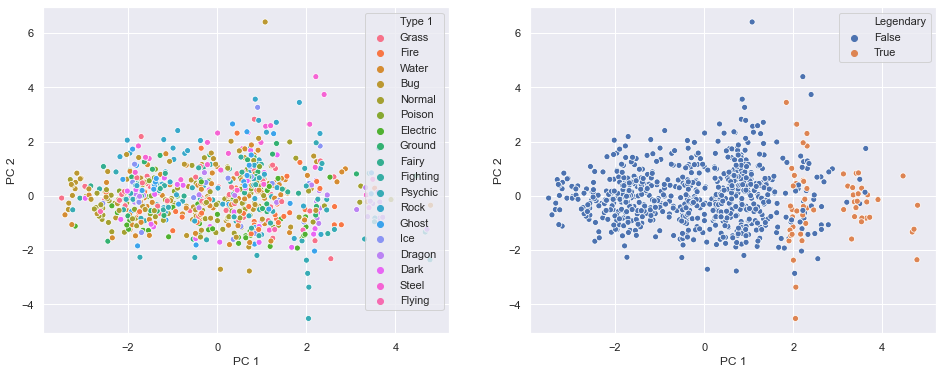

In [38]:
# use the categorical features to color the PC 1 vs PC 2 scatterplot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.scatterplot(x='PC 1',
                y='PC 2',
                hue='Type 1',
                data=poke_cat_df,
                ax=ax[0])

sns.scatterplot(x='PC 1',
                y='PC 2',
                hue='Legendary',
                data=poke_cat_df,
                ax=ax[1])

plt.show()

Here, we can see that different types are scattered all over the place, while legendary Pokemon always scor high for PC 1, meaning they have higher stats overall. Their spread along the PC 2 axis tells that they aren't consistently fast and squishy or slow and armored.

## PCA in a Model Pipeline

Now, we add a classifier that detects whether a Pokemon is legendary or not based on the principal components

In [51]:
X = poke_df_
y = poke_df['Legendary']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [52]:
# build a pipeline for scaling and applying PCA
# and a random forest classifier
steps = [('scaler', StandardScaler()),
         ('reducer', PCA(n_components=2)),
         ('classifier', RandomForestClassifier(random_state=0))]
pipe = Pipeline(steps)

# fit to training data
pipe.fit(X_train, y_train)

# print the explained variance ratio
print(f'Explained variance ratio: {pipe.steps[1][1].explained_variance_ratio_}')

# print test acc
print(f'Test acc: {pipe.score(X_test, y_test): .1%}')

Explained variance ratio: [0.45624044 0.17767414]
Test acc:  95.4%


In [53]:
# do the same for 3 components
steps = [('scaler', StandardScaler()),
         ('reducer', PCA(n_components=3)),
         ('classifier', RandomForestClassifier(random_state=0))]
pipe = Pipeline(steps)

# fit to training data
pipe.fit(X_train, y_train)

# print the explained variance ratio
print(f'Explained variance ratio: {pipe.steps[1][1].explained_variance_ratio_}')

# print test acc
print(f'Test acc: {pipe.score(X_test, y_test): .1%}')

Explained variance ratio: [0.45624044 0.17767414 0.12858833]
Test acc:  94.6%


Adding the third component does not increase the model accuracy, even though it adds information to the dataset.

# Female ANSUR Dataset

In [54]:
ansur_f = pd.read_csv('./ANSUR_II_FEMALE.csv')
print(ansur_f.shape)
ansur_f.head()

(1986, 99)


,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,Combat Support,Regular Army,Female,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,152,756,65.7,1.560,26.997041,Overweight,Normal
1,Combat Service Support,Regular Army,Female,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,155,815,53.4,1.665,19.262506,Normal,Normal
2,Combat Service Support,Regular Army,Female,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,162,799,66.3,1.711,22.647148,Normal,Tall
3,Combat Service Support,Regular Army,Female,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,173,818,78.2,1.660,28.378575,Overweight,Normal
4,Combat Arms,Regular Army,Female,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63,448,499,964,635,428,435,440,491,441,63,479,114,340,358,1350,116,345,242,1151,329,156,824,810,559,1702,1292,1030,766,197,766,429,116,800,1698,452,405,1163,300,380,911,152,762,88.6,1.572,35.853259,Overweight,Normal


## Selecting the proportion of variance to keep

In [55]:
# keep the numerical features only
ansur_df = ansur_f.drop(
    ['Branch', 'Component', 'Gender', 'BMI_class', 'Height_class'], axis=1)

In [56]:
# create a pipeline with scaling and PCA that keeps 80%
# of the variance
steps = [('scaler', StandardScaler()),
         ('reducer', PCA(n_components=0.8))]
pipe = Pipeline(steps)

# fit
pipe.fit(ansur_df)

print(f'{len(pipe.steps[1][1].components_)} components selected.')

11 components selected.


In [57]:
# create a pipeline with scaling and PCA that keeps 90%
# of the variance
steps = [('scaler', StandardScaler()),
         ('reducer', PCA(n_components=0.9))]
pipe = Pipeline(steps)

# fit
pipe.fit(ansur_df)

print(f'{len(pipe.steps[1][1].components_)} components selected.')

23 components selected.


## Choosing the number of components

We now make a more informed decision by inspecting the elbow plot for the explained variances

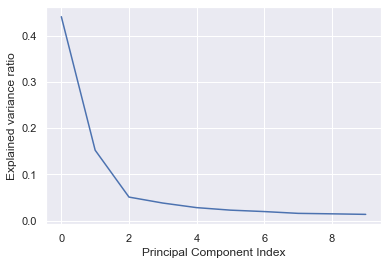

In [58]:
# create a pipeline with scaling and PCA with 10 components
steps = [('scaler', StandardScaler()),
         ('reducer', PCA(n_components=10))]
pipe = Pipeline(steps)

# fit
pipe.fit(ansur_df)

# plot the explained variance ratio
plt.plot(pipe.steps[1][1].explained_variance_ratio_)

plt.xlabel('Principal Component Index')
plt.ylabel('Explained variance ratio')
plt.show()

x-axis is zero-indexed, therefore, the *elbow* in the plot is at 3 components.

# MNIST Dataset

In [68]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

## PCA for Image Compression

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                   test_size=16,
                                   random_state=42)

In [98]:
def plot_16_digits(data):
    fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(5, 5),
                           subplot_kw={'xticks':[], 
                                       'yticks':[]})

    for i, ax in enumerate(ax.flatten()):
        ax.imshow(data[i].reshape(28, 28),
                  cmap='binary',
                  clim=(0, 256))

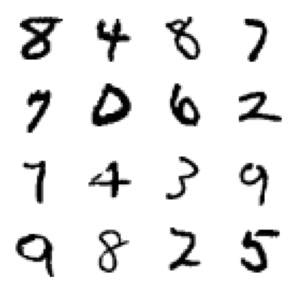

In [99]:
plot_16_digits(X_test)

In [81]:
# create a pipeline with scaler and PCA selecting 78 components
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=78))])
pipe.fit(X_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('reducer', PCA(n_components=78))])

In [82]:
# transform the test data to principal components
pc = pipe.transform(X_test)

# print the number of features per dataset
print(f'X_test has {X_test.shape[1]} features')
print(f'pc has {pc.shape[1]} features')

X_test has 784 features
pc has 78 features


In [83]:
# inverse transform the components to original feature space
X_rebuilt = pipe.inverse_transform(pc)

print(f'X_rebuilt has {X_rebuilt.shape[1]} features')

X_rebuilt has 784 features


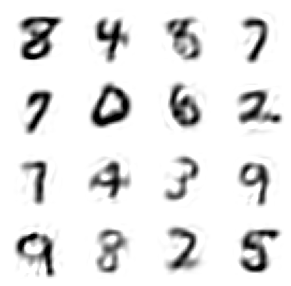

In [100]:
# plot reconstructed data
plot_16_digits(X_rebuilt)
plt.show()

With PCA, the size of the data was reduced 10-fold with a little trade-off but still-reasonable quality.